### IDEAL,ALL POLICY WITH Taxation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [3]:
### Reading excel data to dataframe
df_raw= pd.read_excel("A_DATA/DF_Combined_HSP_N207_Ideal.xlsx")
        
### Taking only necessery coulumn
df = df_raw[['ID','Area','FL2011_Under10K','13.2.1e','FP_Ideal','FP_Baseline','EWFclass_2011','TotalIncome_2021_Year','Save_Rate_Test5','Asset2021','Member_2021']]

### Saving loss due to Flood damage

In [5]:
df['FL'] = df['FL2011_Under10K']

/var/folders/83/yvztylb53773htvnj544w2q00000gn/T/ipykernel_4026/1388672675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FL'] = df['FL2011_Under10K']


### Benefit of Education Experience

In [7]:
### EDUCATION ASSUMED NOT CHANGE
def calculate_benefit(row):
    if row['FP_Ideal'] == 1:
        if 'Poor' in row['EWFclass_2011']:
            return 0
        elif 'Rich' in row['EWFclass_2011']:
            return 1
    elif row['FP_Ideal'] == 0:
        return 1
    return "Invalid input"

# Apply the function to each row and create a new column 'Benefit_edu'
df['Benefit_edu'] = df.apply(calculate_benefit, axis=1)

/var/folders/83/yvztylb53773htvnj544w2q00000gn/T/ipykernel_4026/2799182559.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Benefit_edu'] = df.apply(calculate_benefit, axis=1)


### Benefit of Working Stability

In [9]:
def calculate_benefit(row):
    if row['FP_Ideal'] == 1:
        if 'Poor' in row['EWFclass_2011']:
            return 0
        elif 'Rich' in row['EWFclass_2011']:
            return 1
    elif row['FP_Ideal'] == 0:
        return 1
    return "Invalid input"

# Apply the function to each row and create a new column 'Benefit_edu'
df['Work_stability'] = df.apply(calculate_benefit, axis=1)

/var/folders/83/yvztylb53773htvnj544w2q00000gn/T/ipykernel_4026/41359774.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work_stability'] = df.apply(calculate_benefit, axis=1)


### Area Development Benefit

In [11]:
def calculate_ruraldev(row):
    if row['FP_Ideal'] == 0:
        if 'Urban' in row['EWFclass_2011']:
            return 0
        elif 'Rural' in row['EWFclass_2011']:
            return 1
    elif row['FP_Ideal'] == 1:
        return 0
    return "Invalid input"

# Apply the function to each row and create a new column 'Benefit_edu'
df['Rural_dev'] = df.apply(calculate_ruraldev, axis=1)

/var/folders/83/yvztylb53773htvnj544w2q00000gn/T/ipykernel_4026/522119534.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rural_dev'] = df.apply(calculate_ruraldev, axis=1)


In [12]:
df_cek= df.loc[df['Rural_dev'] == 1]
df_cek

,ID,Area,FL2011_Under10K,13.2.1e,FP_Ideal,FP_Baseline,EWFclass_2011,TotalIncome_2021_Year,Save_Rate_Test5,Asset2021,Member_2021,FL,Benefit_edu,Work_stability,Rural_dev
0,A08_143,A08,20000,0,0,1,W_Rural_Middle_Poor,636000,0.034591,300000,2,20000,1,1,1
1,A08_122,A08,18000,0,0,1,W_Rural_Middle_Rich,579600,0.037612,400000,2,18000,1,1,1
2,A08_124,A08,20000,0,0,1,W_Rural_Middle_Rich,1087200,0.018396,300000,4,20000,1,1,1
3,A08_144,A08,0,0,0,1,W_Rural_Middle_Poor,187200,0.080128,250000,2,0,1,1,1
4,A08_127,A08,50000,0,0,1,W_Rural_Middle_Poor,480000,0.031250,200000,4,50000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,A08_138,A08,10000,6000,0,1,W_Rural_Very_Poor,120000,-0.005000,4000,2,10000,1,1,1
76,A08_78,A08,30000,2000,0,1,W_Rural_Middle_Rich,1128000,-0.000887,10000,4,30000,1,1,1
77,A06_63,A06,0,0,0,1,W_Rural_Middle_Poor,241200,-0.007048,3000,2,0,1,1,1
78,A06_90,A06,25000,2000,0,1,W_Rural_Middle_Poor,60000,-0.045000,48000,2,25000,1,1,1


### Income Improvement

In [14]:
df.head()

,ID,Area,FL2011_Under10K,13.2.1e,FP_Ideal,FP_Baseline,EWFclass_2011,TotalIncome_2021_Year,Save_Rate_Test5,Asset2021,Member_2021,FL,Benefit_edu,Work_stability,Rural_dev
0,A08_143,A08,20000,0,0,1,W_Rural_Middle_Poor,636000,0.034591,300000,2,20000,1,1,1
1,A08_122,A08,18000,0,0,1,W_Rural_Middle_Rich,579600,0.037612,400000,2,18000,1,1,1
2,A08_124,A08,20000,0,0,1,W_Rural_Middle_Rich,1087200,0.018396,300000,4,20000,1,1,1
3,A08_144,A08,0,0,0,1,W_Rural_Middle_Poor,187200,0.080128,250000,2,0,1,1,1
4,A08_127,A08,50000,0,0,1,W_Rural_Middle_Poor,480000,0.031250,200000,4,50000,1,1,1


In [15]:
# DataFrame named df with the initial income column df['TotalIncome_2021']
# want to calculate income for the next 20 years

# Initialize DataFrame to store income data for the next 10 years
Income_data = {'ID': range(1, 208)}  # 207 rows
for year in range(2021, 2041):
    Income_data[f'TotalIncome_{year}'] = 0  # Initialize all income columns with 0

dfi_new = pd.DataFrame(Income_data)

# Copy initial income values to the first year column (2021)
dfi_new['ID'] = df['ID']
dfi_new[f'TotalIncome_2021'] = df['TotalIncome_2021_Year']
dfi_new['Benefit_edu'] = df['Benefit_edu']
dfi_new['Rural_dev'] = df['Rural_dev']
dfi_new['Member'] = df['Member_2021']
dfi_new['EWFclass_2011'] = df['EWFclass_2011']
dfi_new['Work_stability'] = df['Work_stability']

############################
#YR 2022 and 2023, Investment if any has occured, but kids still undergo education experience 
dfi_new['TotalIncome_2022'] = dfi_new['TotalIncome_2021']
dfi_new['TotalIncome_2023'] = dfi_new['TotalIncome_2021']

############################
#YR 2024, one member of household finished education based on experience after investment (if any) and start working
def calculate_multiplier(benefit_edu, ewfclass):
    if benefit_edu == 1:
        if 'Rich' in ewfclass:
            return 30197
        elif 'Poor' in ewfclass:
            return 19295
    elif benefit_edu == 0:
        if 'Rich' in ewfclass:
            return 30197
        elif 'Poor' in ewfclass:
            return 11054
    return 0

dfi_new['Multiplier'] = dfi_new.apply(lambda row: calculate_multiplier(row['Benefit_edu'], row['EWFclass_2011']), axis=1)

# Adjust the multiplier based on Work_stability
adjusted_multiplier = np.where(dfi_new['Work_stability'] == 0, dfi_new['Multiplier'] * 0.7, dfi_new['Multiplier'])

# Calculate TotalIncome_2024 using the adjusted multiplier
dfi_new['TotalIncome_2024'] = dfi_new['TotalIncome_2023'] + (adjusted_multiplier * 12)
#dfi_new['TotalIncome_2024'] = dfi_new['TotalIncome_2023'] + ( dfi_new['Multiplier'] * 12)   

###############################
for year in range(2024, 2041):
    previous_year_column = f'TotalIncome_{year - 1}'
    current_year_column = f'TotalIncome_{year}'
    
    # Common increase equation
    common_increase = dfi_new['Benefit_edu'] * 0.042 * dfi_new[previous_year_column] #/ dfi_new['Member']
    rural_dev_increase = dfi_new['Rural_dev']*0.036*dfi_new[previous_year_column]
    
    if year in range(2025, 2027):  
        dfi_new[current_year_column] = dfi_new[previous_year_column] + common_increase
    elif year in range(2027, 2041): 
        rural_dev_increase = dfi_new['Rural_dev'] * 0.036 * dfi_new[previous_year_column]
        dfi_new[current_year_column] = dfi_new[previous_year_column] + common_increase + rural_dev_increase                                                                                                                                 

# Display the resulting DataFrame
print(dfi_new)

          ID  TotalIncome_2021  TotalIncome_2022  TotalIncome_2023  \
0    A08_143            636000            636000            636000   
1    A08_122            579600            579600            579600   
2    A08_124           1087200           1087200           1087200   
3    A08_144            187200            187200            187200   
4    A08_127            480000            480000            480000   
..       ...               ...               ...               ...   
202   A07_16            732000            732000            732000   
203   A05_79            240000            240000            240000   
204   A05_78            360000            360000            360000   
205    A07_1            576000            576000            576000   
206   A07_12            600000            600000            600000   

     TotalIncome_2024  TotalIncome_2025  TotalIncome_2026  TotalIncome_2027  \
0            867540.0        903976.680      9.419437e+05      1.015415e+06   
1

In [16]:
dfi_new

,ID,TotalIncome_2021,TotalIncome_2022,TotalIncome_2023,TotalIncome_2024,TotalIncome_2025,TotalIncome_2026,TotalIncome_2027,TotalIncome_2028,TotalIncome_2029,...,TotalIncome_2037,TotalIncome_2038,TotalIncome_2039,TotalIncome_2040,Benefit_edu,Rural_dev,Member,EWFclass_2011,Work_stability,Multiplier
0,A08_143,636000,636000,636000,867540.0,903976.680,9.419437e+05,1.015415e+06,1.094618e+06,1.179998e+06,...,2.151946e+06,2.319798e+06,2.500742e+06,2.695800e+06,1,1,2,W_Rural_Middle_Poor,1,19295
1,A08_122,579600,579600,579600,941964.0,981526.488,1.022751e+06,1.102525e+06,1.188522e+06,1.281227e+06,...,2.336556e+06,2.518807e+06,2.715274e+06,2.927065e+06,1,1,2,W_Rural_Middle_Rich,1,30197
2,A08_124,1087200,1087200,1087200,1449564.0,1510445.688,1.573884e+06,1.696647e+06,1.828986e+06,1.971647e+06,...,3.595665e+06,3.876127e+06,4.178465e+06,4.504385e+06,1,1,4,W_Rural_Middle_Rich,1,30197
3,A08_144,187200,187200,187200,418740.0,436327.080,4.546528e+05,4.901157e+05,5.283448e+05,5.695557e+05,...,1.038691e+06,1.119709e+06,1.207046e+06,1.301195e+06,1,1,2,W_Rural_Middle_Poor,1,19295
4,A08_127,480000,480000,480000,711540.0,741424.680,7.725645e+05,8.328245e+05,8.977849e+05,9.678121e+05,...,1.764985e+06,1.902654e+06,2.051061e+06,2.211044e+06,1,1,4,W_Rural_Middle_Poor,1,19295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,A07_16,732000,732000,732000,963540.0,1004008.680,1.046177e+06,1.090116e+06,1.135901e+06,1.183609e+06,...,1.644940e+06,1.714028e+06,1.786017e+06,1.861029e+06,1,0,4,W_Urban_Very_Poor,1,19295
203,A05_79,240000,240000,240000,602364.0,627663.288,6.540251e+05,6.814942e+05,7.101170e+05,7.399419e+05,...,1.028346e+06,1.071537e+06,1.116541e+06,1.163436e+06,1,0,1,E_Urban_Middle_Rich,1,30197
204,A05_78,360000,360000,360000,722364.0,752703.288,7.843168e+05,8.172581e+05,8.515830e+05,8.873495e+05,...,1.233208e+06,1.285003e+06,1.338973e+06,1.395210e+06,1,0,3,E_Urban_Middle_Rich,1,30197
205,A07_1,576000,576000,576000,938364.0,977775.288,1.018842e+06,1.061633e+06,1.106222e+06,1.152683e+06,...,1.601960e+06,1.669242e+06,1.739351e+06,1.812403e+06,1,0,4,W_Urban_Middle_Rich,1,30197


### Net Total Cash (NTC) per Year

In [18]:
# Initialize DataFrame to store income data for the next 10 years
Saving_data = {'ID': range(1, 208)}  # 207 rows
for year in range(2021, 2041):
    Saving_data[f'NTC_{year}'] = 0  # Initialize all income columns with 0

dfs_new = pd.DataFrame(Saving_data)

# Copy initial income values to the first year column (2021)
dfs_new['ID'] = df['ID']
dfs_new[f'NTC_2021'] = df['Asset2021']
dfs_new['FL'] = df['FL']
dfs_new['FP'] = df['FP_Ideal']
dfs_new['Save_rate'] = df['Save_Rate_Test5']
dfs_new['Save_rate_change'] = df['Save_Rate_Test5']
dfs_new['EWFclass_2011'] = df['EWFclass_2011']

# Adjust Save_rate if 'EWFclass_2011' contains both 'rural' and 'poor'
condition_urban_poor = dfs_new['EWFclass_2011'].str.contains('urban', case=False) & dfs_new['EWFclass_2011'].str.contains('poor', case=False)
dfs_new.loc[condition_urban_poor, 'Save_rate_change'] *= 1.5 
        
condition_rural_poor = dfs_new['EWFclass_2011'].str.contains('rural', case=False) & dfs_new['EWFclass_2011'].str.contains('poor', case=False)
dfs_new.loc[condition_rural_poor, 'Save_rate_change'] *= 0.57

# Calculate income for each subsequent year based on the equation

for year in range(2022, 2041):
    previous_year_column = f'NTC_{year - 1}'
    current_year_column = f'NTC_{year}'
    year_column = f'TotalIncome_{year}'
    
    if year >= 2031:
        dfs_new[current_year_column] = dfs_new[previous_year_column] + (dfs_new['Save_rate_change']*dfi_new[year_column]) #- (dfs_new['FP']*dfs_new['FL'])
    
    #if year >= 2026 and year % 6 == 0:  # Apply the equation once every 6 years starting from 2026
        #dfs_new[current_year_column] = dfs_new[previous_year_column] + (dfs_new['Save_rate_change']*dfi_new[year_column]) - (dfs_new['FP']*dfs_new['FL'])
  
    else:
        dfs_new[current_year_column] = dfs_new[previous_year_column] + (dfs_new['Save_rate']*dfi_new[year_column])
    
   # dfs_new[current_year_column] = dfs_new[current_year_column].apply(lambda x: max(x, 0))

# Apply the taxation rules based on EWFclass_2011
    dfs_new.loc[dfs_new['EWFclass_2011'].str.contains('poor', case=False), current_year_column] *= 1
    dfs_new.loc[dfs_new['EWFclass_2011'].str.contains('rich', case=False), current_year_column] *= 0.965

# Display the resulting DataFrame
print(dfs_new)

          ID  NTC_2021  NTC_2022     NTC_2023       NTC_2024       NTC_2025  \
0    A08_143    300000  322000.0  344000.0000  374009.245283  405278.878868   
1    A08_122    400000  407037.0  413827.7050  433532.998037  453984.554852   
2    A08_124    300000  308800.0  317292.0000  331919.474260  347115.760081   
3    A08_144    250000  265000.0  280000.0000  313552.884615  348514.990385   
4    A08_127    200000  215000.0  230000.0000  252235.625000  275405.146250   
..       ...       ...       ...          ...            ...            ...   
202   A07_16     10000   10000.0   10000.0000   10000.000000   10000.000000   
203   A05_79     10000   10132.5   10260.3625   11112.252437   11985.188337   
204   A05_78     10000   10132.5   10260.3625   10869.418229   11497.820081   
205    A07_1     10000   10518.5   11018.8525   12048.069631   13100.688996   
206   A07_12      5000    5200.0    5400.0000    5677.180000    5966.001560   

          NTC_2026       NTC_2027       NTC_2028   

### Calculating the average NTC of each year by cattegory

In [20]:
df_fp = dfs_new[dfs_new['ID'].str.contains("A06|A08|A09", na=False)]
df_nfp = dfs_new[dfs_new['ID'].str.contains("A03|A04|A05|A07", na=False)]

In [21]:
nfp_np = df_nfp[df_nfp['EWFclass_2011'].str.contains("Rich")]
nfp_p = df_nfp[df_nfp['EWFclass_2011'].str.contains("Poor")]
fp_np = df_fp[df_fp['EWFclass_2011'].str.contains("Rich")]
fp_p = df_fp[df_fp['EWFclass_2011'].str.contains("Poor")]

In [22]:
fp_np.head()

,ID,NTC_2021,NTC_2022,NTC_2023,NTC_2024,NTC_2025,NTC_2026,NTC_2027,NTC_2028,NTC_2029,...,NTC_2036,NTC_2037,NTC_2038,NTC_2039,NTC_2040,FL,FP,Save_rate,Save_rate_change,EWFclass_2011
1,A08_122,400000,407037.0,413827.7050,433532.998037,453984.554852,475216.566072,498600.931609,524288.166089,552441.132195,...,835297.345341,890868.907422,951110.408426,1.016374e+06,1.087041e+06,18000,0,0.037612,0.037612,W_Rural_Middle_Rich
2,A08_124,300000,308800.0,317292.0000,331919.474260,347115.760081,362906.341529,380323.544005,399480.420499,420499.325958,...,632354.380911,674052.304286,719269.565825,7.682713e+05,8.213438e+05,20000,0,0.018396,0.018396,W_Rural_Middle_Rich
7,A08_119,200000,202939.5,205776.1175,211242.026856,217048.688470,223206.522494,230221.686302,238147.855959,247043.356115,...,342502.108890,361937.877697,383144.415319,4.062509e+05,4.313970e+05,3000,0,0.007803,0.007803,W_Rural_Middle_Rich
9,A08_145,197000,199755.0,202413.5750,208932.981150,215795.571099,223013.330660,231130.575791,240205.688855,250302.018253,...,356121.263675,377401.647098,400569.298057,4.257635e+05,4.531345e+05,3000,0,0.011307,0.011307,W_Rural_Middle_Rich
13,A08_121,197000,197825.0,198621.1250,206049.981054,213822.812153,221952.946543,231016.412988,241075.540035,252197.884352,...,366794.790671,389628.251533,414444.900991,4.413924e+05,4.706300e+05,3000,0,0.019048,0.019048,W_Rural_Middle_Rich


In [23]:
df_mean =nfp_np.describe().loc['mean'].to_frame().rename(columns={'mean': 'nfp_np'})

In [24]:
df_mean['nfp_p'] = nfp_p.describe().loc['mean'].to_frame().rename(columns={'mean': 'nfp_p'})
df_mean['fp_np'] = fp_np.describe().loc['mean'].to_frame().rename(columns={'mean': 'fp_np'})
df_mean['fp_p'] = fp_p.describe().loc['mean'].to_frame().rename(columns={'mean': 'fp_p'})

In [25]:
new_row_data = {
    'nfp_np': 65477,
    'fp_p': 26937,
    'nfp_p': 26787,
    'fp_np': 72281}
new_row_df = pd.DataFrame(new_row_data, index=['NTC_2011'])

In [26]:
df_mean = pd.concat([new_row_df, df_mean])
df_mean.index.name = 'Year'

In [27]:
df_mean

,nfp_np,fp_p,nfp_p,fp_np
Year,,,,
NTC_2011,65477.000000,26937.000000,26787.000000,72281.000000
NTC_2021,169068.965517,64171.875000,66875.000000,136750.000000
NTC_2022,173148.175287,67895.312500,70883.750000,138184.984375
NTC_2023,177084.612716,71618.750000,74892.500000,139569.744297
NTC_2024,185257.397953,79815.049749,80677.509608,144797.400433
NTC_2025,193747.707069,88355.594088,86705.489619,150266.817686
NTC_2026,202569.776723,97254.841289,92986.644790,155987.373039
NTC_2027,211738.409994,106848.229771,99531.608479,162364.140683
NTC_2028,221269.001269,117189.902556,106351.460642,169440.954866


In [28]:
df_mean.index = df_mean.index.str.replace('NTC_', '')

In [29]:
df_mean = df_mean.drop(['FL', 'FP', 'Save_rate','Save_rate_change'])

In [30]:
#index = [2011, 2021, 2022, 2023, 2024, 2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040]


#df = pd.DataFrame(df_mean, index=index)
# Divide all values in the DataFrame by 1000
df_mean = df_mean / 1000

In [31]:
df_mean

,nfp_np,fp_p,nfp_p,fp_np
Year,,,,
2011,65.477000,26.937000,26.787000,72.281000
2021,169.068966,64.171875,66.875000,136.750000
2022,173.148175,67.895313,70.883750,138.184984
2023,177.084613,71.618750,74.892500,139.569744
2024,185.257398,79.815050,80.677510,144.797400
2025,193.747707,88.355594,86.705490,150.266818
2026,202.569777,97.254841,92.986645,155.987373
2027,211.738410,106.848230,99.531608,162.364141
2028,221.269001,117.189903,106.351461,169.440955


In [32]:
df_mean.to_excel('Ideal_Scen8D.xlsx')

### 20 Years Projection

In [34]:
df = pd.read_excel("Ideal_Scen8D.xlsx")

/var/folders/83/yvztylb53773htvnj544w2q00000gn/T/ipykernel_4026/1595331375.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  binary_data['Occurrence'].fillna(0, inplace=True)


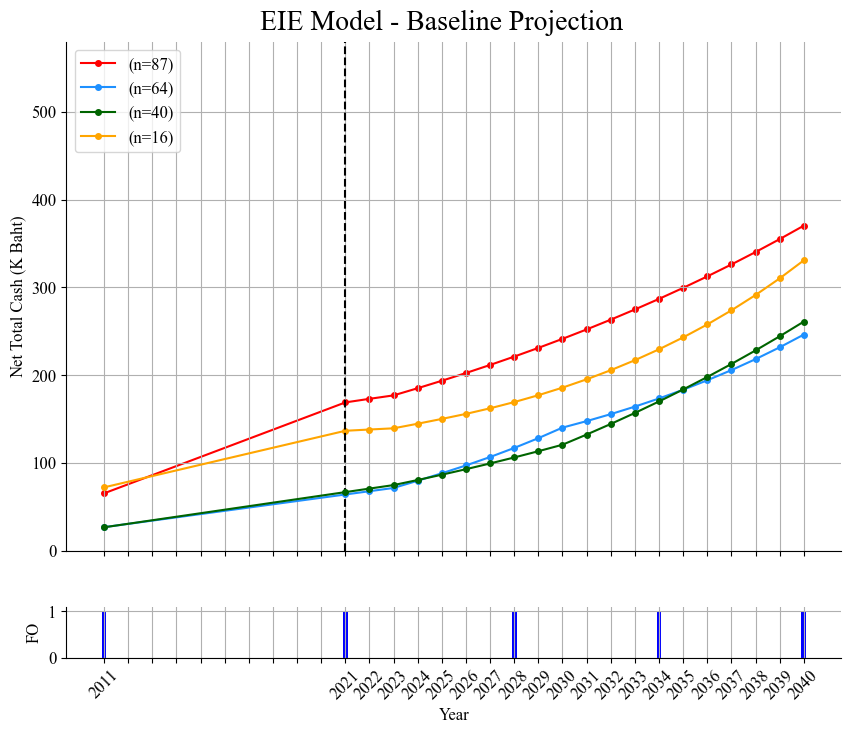

In [35]:

# Create an empty DataFrame to store the binary values
binary_data = pd.DataFrame(index=range(2011, 2041))

# Set the value to 1 for the years 2011 and 2021
binary_data.loc[2011, 'Occurrence'] = 1
binary_data.loc[2021, 'Occurrence'] = 1

# Set the value to 1 for every 6th year starting from 2026
for year in range(2028, 2041, 6):
    binary_data.loc[year, 'Occurrence'] = 1

# Fill NaN values with 0 (no occurrence)
binary_data['Occurrence'].fillna(0, inplace=True)

# Plotting the time series data
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [10, 1]})
fig.suptitle("EIE Model - Baseline Projection", fontsize=20, y=0.92)

# Plot the time series data in the upper subplot
ax0.plot(df['Year'], df['nfp_np'], c='red', label='(n=87)', marker='o', markersize=4, zorder=1)
ax0.plot(df['Year'], df['fp_p'], c='dodgerblue', label='(n=64)', marker='o', markersize=4, zorder=3)
ax0.plot(df['Year'], df['nfp_p'], c='darkgreen', label='(n=40)', marker='o', markersize=4, zorder=4)
ax0.plot(df['Year'], df['fp_np'], c='orange', label='(n=16)', marker='o', markersize=4, zorder=2)

ax0.set_ylabel('Net Total Cash (K Baht)')
ax0.grid(True)
ax0.legend(loc='upper left')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.axvline(x=2021, color='black', linestyle='--', label='Year 2021')

# Move legend to the left side


# Set the x-axis ticks for the upper subplot
ax0.set_xticks(range(2011, 2041))

# Plot the binary values in the lower subplot with smaller bars
ax1.bar(binary_data.index, binary_data['Occurrence'], color='b', width=0.2)
ax1.set_xlabel('Year')
ax1.set_ylabel('FO')
ax1.grid(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set the y-axis limits or scale for smaller bars
ax0.set_ylim(0, 580)  # Adjust the y-axis limits
ax1.set_ylim(0, 1.1)  # Adjust the y-axis limits

# Set the x-axis ticks for the upper subplot
#ax0.set_xticks(range(2011, 2041))
ax0.set_xticklabels(['' if year in range(2012, 2021) else str(year) for year in range(2011, 2041)])  # Remove tick labels for 2012-2020


plt.xticks(rotation=45)

plt.savefig('SeconderyBenefit_WithTaxation.png', dpi=300, bbox_inches='tight')
plt.show()


### Paper plot

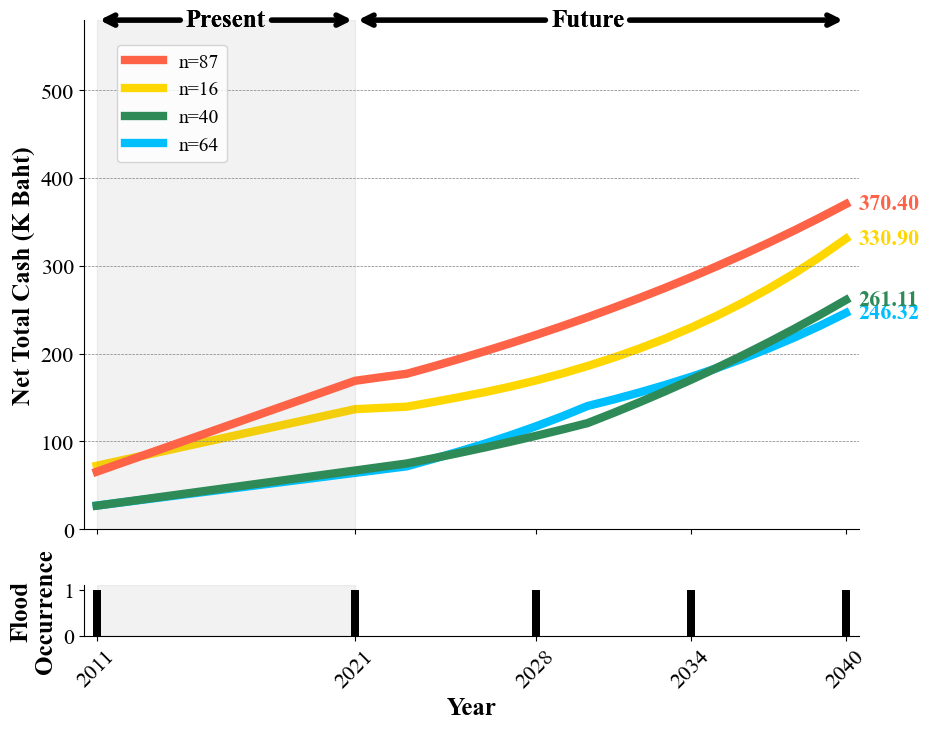

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty DataFrame to store the binary values
binary_data = pd.DataFrame(index=range(2011, 2041))

# Set the value to 1 for the years 2011 and 2021
binary_data.loc[2011, 'Occurrence'] = 1
binary_data.loc[2021, 'Occurrence'] = 1

# Set the value to 1 for every 6th year starting from 2026
for year in range(2028, 2041, 6):
    binary_data.loc[year, 'Occurrence'] = 1

# Fill NaN values with 0 (no occurrence)
binary_data['Occurrence'] = binary_data['Occurrence'].fillna(0)

# Plotting the time series data
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16  # Increased font size

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [10, 1]})

# Plot the time series data in the upper subplot
line1, = ax0.plot(df['Year'], df['nfp_np'], c='tomato', label='(n=87)', linewidth=6, zorder=2)
line2, = ax0.plot(df['Year'], df['fp_p'], c='deepskyblue', label='(n=64)', linewidth=6, zorder=3)
line3, = ax0.plot(df['Year'], df['nfp_p'], c='seagreen', label='(n=40)', linewidth=6, zorder=4)
line4, = ax0.plot(df['Year'], df['fp_np'], c='gold', label='(n=16)', linewidth=6, zorder=1)

# Adjust the xlim to extend slightly beyond 2011 and 2040
ax0.set_xlim(2010.5, 2040.5)  # Adds extra space before 2011 and after 2040
ax0.set_ylim(0, 580)

# Manually set legend in desired order
ax0.legend([line1, line4, line3, line2], ['n=87', 'n=16', 'n=40', 'n=64'], fontsize=14, loc='upper left', bbox_to_anchor=(0.03, 0.97))

##############################################################################################
# Add arrows with text annotations
ax0.annotate('Present', xy=(2011, 580), xytext=(2016, 580),
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=4),
             fontsize=18, color='black', ha='center', va='center', fontweight='bold')

ax0.annotate('Present', xy=(2021, 580), xytext=(2016, 580),
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=4),
             fontsize=18, color='black', ha='center', va='center', fontweight='bold')

ax0.annotate('Future', xy=(2021, 580), xytext=(2030, 580),
           arrowprops=dict(facecolor='black', arrowstyle='->', lw=4),
             fontsize=18, color='black', ha='center', va='center', fontweight='bold')

ax0.annotate('Future', xy=(2040, 580), xytext=(2030, 580),
           arrowprops=dict(facecolor='black', arrowstyle='->', lw=4),
             fontsize=18, color='black', ha='center', va='center', fontweight='bold')

##############################################################################################
             
# Set labels and make them bold
ax0.set_ylabel('Net Total Cash (K Baht)', fontsize=18, fontweight='bold')
ax1.set_xlabel('Year', fontsize=18, fontweight='bold')  # Larger x-axis label font size
ax1.set_ylabel('Flood\nOccurrence', fontsize=18, fontweight='bold')  # Two lines for y-axis label

# Remove horizontal grid lines (just vertical grid lines)
# Enable only horizontal grid lines
ax0.grid(axis='y', linestyle='--', color='gray', linewidth=0.5)  # Dashed horizontal grid lines
#ax0.grid(False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

# Add shaded region between 2011 and 2021
ax0.axvspan(2011, 2021, color='gray', alpha=0.1)  # Shaded area between 2011 and 2021
ax1.axvspan(2011, 2021, color='gray', alpha=0.1)  # Shaded area between 2011 and 2021

# Set the x-axis ticks to include 2011, 2021, and every 6th year from 2028 to 2040
xticks = [2011, 2021] + list(range(2028, 2041, 6))
ax0.set_xticks(xticks)

# Annotate the end values at year 2040 with their respective line colors
ax0.annotate(f'{df["nfp_np"].iloc[-1]:.2f}', xy=(2040, df["nfp_np"].iloc[-1]), xytext=(2040 + 0.5, df["nfp_np"].iloc[-1]),
             textcoords='data', color='tomato', fontsize=16, fontweight='bold', va='center')
ax0.annotate(f'{df["fp_p"].iloc[-1]:.2f}', xy=(2040, df["fp_p"].iloc[-1]), xytext=(2040 + 0.5, df["fp_p"].iloc[-1]),
             textcoords='data', color='deepskyblue', fontsize=16, fontweight='bold', va='center')
ax0.annotate(f'{df["nfp_p"].iloc[-1]:.2f}', xy=(2040, df["nfp_p"].iloc[-1]), xytext=(2040 + 0.5, df["nfp_p"].iloc[-1]),
             textcoords='data', color='seagreen', fontsize=16, fontweight='bold', va='center')
ax0.annotate(f'{df["fp_np"].iloc[-1]:.2f}', xy=(2040, df["fp_np"].iloc[-1]), xytext=(2040 + 0.5, df["fp_np"].iloc[-1]),
             textcoords='data', color='gold', fontsize=16, fontweight='bold', va='center')

# Plot the binary values in the lower subplot with smaller bars
ax1.bar(binary_data.index, binary_data['Occurrence'], color='black', width=0.3)

# Remove horizontal grid lines in the lower subplot as well
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Adjust the xlim for the lower subplot to align with the upper subplot
ax1.set_xlim(2010.5, 2040.5)  # Same x-axis limit as ax0

# Set the y-axis limits or scale for smaller bars
ax1.set_ylim(0, 1.1)  # Adjust the y-axis limits

plt.xticks(rotation=45)

# Save and show the plot
plt.savefig('Paperplot_FCI_Secondery_WithTax.png', dpi=300, bbox_inches='tight')
plt.show()
